In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# import tools
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# import Models
from sklearn.ensemble import RandomForestClassifier

# suppress warnings
import warnings;
warnings.filterwarnings('ignore');

In [2]:
# import the data using encoding = 'ISO-8859-1': takehome_users
takehome_users = pd.read_csv('/Users/ryneschultz/OneDrive/Data Science Career Track/Take-Home Challenges/relax_challenge/takehome_users.csv',
                            encoding = 'ISO-8859-1')

# Save 'last_session_creation_time' to a new variable: last_session_creation_times
last_session_creation_times = takehome_users['last_session_creation_time']

# Replace missing values with 0: last_session_creation_times
last_session_creation_times = last_session_creation_times.fillna(0)

# Convert values to int: last_session_creation_times
last_session_creation_times = last_session_creation_times.astype(int)

# Convert ints to datetinme using utcfromtimestamp: last_session_creation_times
last_session_creation_times = [datetime.datetime.utcfromtimestamp(time).strftime('%Y-%m-%d %H:%M:%S') for time in last_session_creation_times]

# Convert the array to a dataframe: last_session_creation_times
last_session_creation_times = pd.DataFrame(last_session_creation_times)

# Replace the Unix timestamp of 0 (1970-01-01T00:00:00+00:00) to NaN: last_session_creation_times
last_session_creation_times = last_session_creation_times.replace('1970-01-01 00:00:00', np.nan)

# Replace 'last_session_creation_time' with last_session_creation_times
takehome_users['last_session_creation_time'] = last_session_creation_times

# inspect the data
takehome_users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0


In [3]:
# Import the data using encoding = 'ISO-8859-1': takehome_user_engagement
takehome_user_engagement = pd.read_csv('/Users/ryneschultz/OneDrive/Data Science Career Track/Take-Home Challenges/relax_challenge/takehome_user_engagement.csv',
                            encoding = 'ISO-8859-1', parse_dates=['time_stamp'])

# Describe takehome_user_engagement
takehome_user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [4]:
# Convert 'time_stamp' to datetime
takehome_user_engagement['time_stamp'] = pd.to_datetime(takehome_user_engagement['time_stamp'])

# Create a new 'week' feature which gives the relevant week for each 'time_stamp' 
takehome_user_engagement['week'] = takehome_user_engagement['time_stamp'].dt.week

# Groupby week and user_id and create a new feature 'freq' which counts the frequency of 'time_stamp' for each week
takehome_user_engagement = takehome_user_engagement.groupby(['week','user_id'])['time_stamp'].count().reset_index(name="freq")

# Inspect the new table
takehome_user_engagement

,week,user_id,freq
0,1,2,1
1,1,10,5
2,1,42,4
3,1,43,1
4,1,46,1
5,1,63,7
6,1,69,10
7,1,81,3
8,1,82,4
9,1,87,4


In [5]:
# Filter on those rows where 'freq' is greater than or equal to 3
adopted_users = takehome_user_engagement[takehome_user_engagement['freq'] >= 3] 

# Save the adopted users to a new adopted_users list
adopted_users = adopted_users['user_id'].tolist()

# Print the number of adopted users
print('Number of Adopted Users: ', len(adopted_users))
print('\n')

# Print the percentage of users that adopt
print('Percentage of Users that Adopt: ', len(adopted_users) / len(takehome_user_engagement))

Number of Adopted Users:  29771


Percentage of Users that Adopt:  0.5207269292660743


In [6]:
# Save 'object_id' into a new variable: users
users = takehome_users['object_id']

# For each user in users, check to see if that user is in adopted_users. If yes, set the value equal to 1; if no, set it equal to 0
takehome_users['adopted_users'] = [int(user in adopted_users) for user in users]

# Convert 'creation_sourse' to a dummy variable using one-hot encoding
takehome_users = pd.get_dummies(takehome_users, columns=['creation_source'])

# Inspect takehome_users
takehome_users

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,0,0,193,5240.0,0,1,0,0,0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,2013-12-19 03:37:06,0,0,197,11241.0,0,1,0,0,0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,2012-12-20 13:24:32,0,1,37,NaN,0,0,0,0,1,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,NaN,1,1,74,NaN,0,0,0,1,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,NaN,0,0,302,NaN,0,0,0,1,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,2014-06-03 22:08:03,1,1,318,4143.0,1,0,1,0,0,0


In [7]:
# Create variables X and y from the dataset
X = takehome_users.drop(columns=['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 'org_id', 'invited_by_user_id', 'adopted_users'])
y = takehome_users['adopted_users']

# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

# Set an instance of RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10000, oob_score=True, n_jobs=-1, random_state=23, warm_start=True)

# Fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=True, random_state=23, verbose=0, warm_start=True)

In [8]:
# Predict y values using the model
y_pred = rfc.predict(X_test)

# Convert y_test to DataFrame
y_test = pd.DataFrame(y_test)

# Reset the index
y_test = y_test.reset_index()

# Drop new 'index' column
y_test = y_test.drop(columns=['index'])

# Combine y_test and y_pred into a single DataFrame
y_test['predicted'] = y_pred

# Determine accuracy: accuracy
accuracy = len(y_test[y_test['adopted_users'] == y_test['predicted']])/len(y_test)
print('Naive Model Accuracy: ', accuracy)

# Validate the model using 5-fold cross-validation
print('Mean Cross-Val Score: ', cross_val_score(rfc, X, y, cv=5).mean())  

Naive Model Accuracy:  0.8783333333333333
Mean Cross-Val Score:  0.8795833333333334


In [9]:
# determine the most important features
feature_imp = pd.DataFrame(rfc.feature_importances_,
                           index = X_train.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
creation_source_PERSONAL_PROJECTS,0.356475
creation_source_GUEST_INVITE,0.204694
enabled_for_marketing_drip,0.120305
opted_in_to_mailing_list,0.111893
creation_source_ORG_INVITE,0.080637
creation_source_SIGNUP_GOOGLE_AUTH,0.067708
creation_source_SIGNUP,0.058288


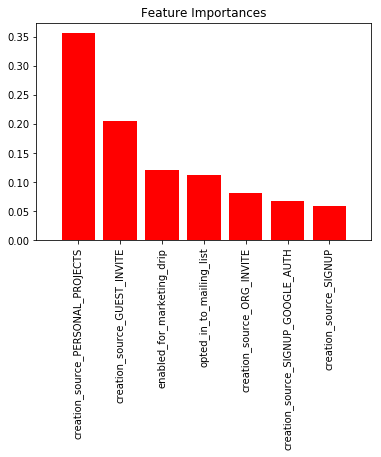

In [10]:
# plot feature importance
plt.figure()
plt.bar(range(X.shape[1]), feature_imp.values.reshape(1,7)[0],
       color="r", align="center")
plt.title("Feature Importances")
plt.xticks(range(X.shape[1]), feature_imp.index.values, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

## Findings

The original problem statement was the following: defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, *identify which factors predict future user adoption*.

After wrangling the data, processing it, creating and running a predictive model on the cleaned data, and cross-validating it, we can say that the features that most accurately predict future user adoption are the means by which the users arrive on the platform.

Specifically, if the user was invited to join another user's personal workspace or if the user was invited to an organization as a guest (with limited permissions), that user is much more likely to adopt the platform. However, of the two, if the user was invited to join another user's personal workspace they are the most likely to adopt. This is most likely because of the nature in which they are invited on to the platform. By being asked to join another user's personal workspace (or just the simple act of being *invited* onto the platform) they are likely to be an integral member of the iniviting member's group. As such, they are likely to stay on the platform and to engage with the platform more often as they collaborate with the iniviting member and are thus much more likely to adopt than, say, a user who simply signs up for the platform through the normal sign-up process.

Additionally, it appears that users that enabled marketing campaigns and who were a part of the company's mailing list also adopted at higher rates. This is because these campaigns drive user engagement, and if there is a greater engagement the user is much more likely to adopt.

In all, it appears that initiatives that encourage/drive more collaboration on the platform by encouraging existing users to invite new users - particularly into their own personal working space - drive adoption the most, perhaps even more so if coupled with a strong email marketing campaign to alert users of the new initiatives.